In [56]:
import requests
import json
import time
import os
import numpy as np
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt

In [57]:
def getPage(page = 0):
    """
    Создаем метод для получения страницы со списком вакансий.
    Аргументы:
        page - Индекс страницы, начинается с 0. Значение по умолчанию 0, т.е. первая страница
    """
    
    # Справочник для параметров GET-запроса
    params = {
        'text': 'Разработчик', # Текст фильтра. В имени должно быть слово "Аналитик"
        'area': 1, # Поиск ощуществляется по вакансиям города Москва
        #'page': page, # Индекс страницы поиска на HH
        'per_page': 100, # Кол-во вакансий на 1 странице
        'only_with_salary':'True'
    }
    
    
    req = requests.get('https://api.hh.ru/vacancies', params) # Посылаем запрос к API
    items = req.json()['items'] # Декодируем его ответ, чтобы Кириллица отображалась корректно
    req.close()
    return items

In [58]:
js = getPage(0)
salary = np.array(list(map(lambda x: x['salary']['from'] if x['salary']['from'] is not None else 12000, js)))

In [59]:
#js
js[salary.argmax()]['name']

'Главный бухгалтер (производство)'

In [60]:
a = np.zeros((len(js),3))

for i in range(len(js)):
    if (js[i]['salary']['from'] is not None) and (js[i]['salary']['to'] is not None):
        a[i][0] = float(js[i]['id'])
        a[i][1] = float(js[i]['salary']['from'])
        a[i][2] = float(js[i]['salary']['to'])
    elif (js[i]['salary']['from'] is not None):
        a[i][0] = float(js[i]['id'])
        a[i][1] = float(js[i]['salary']['from'])
        a[i][2] = -1
    else:
        a[i][0] = float(js[i]['id'])
        a[i][1] = -1
        a[i][2] = float(js[i]['salary']['to'])
        

print(a)

[[ 8.3777631e+07  1.0000000e+05  1.3000000e+05]
 [ 8.4027631e+07  5.0000000e+04 -1.0000000e+00]
 [ 8.5264618e+07  5.0000000e+04 -1.0000000e+00]
 [ 8.4750051e+07 -1.0000000e+00  5.0000000e+04]
 [ 8.4213663e+07  6.0000000e+04  6.0000000e+04]
 [ 8.5225901e+07  8.0000000e+04 -1.0000000e+00]
 [ 8.5230547e+07  1.4000000e+05 -1.0000000e+00]
 [ 8.3966648e+07  5.0000000e+04  9.0000000e+04]
 [ 8.4467721e+07  8.0000000e+04  1.3500000e+05]
 [ 8.4831215e+07  6.0000000e+04 -1.0000000e+00]
 [ 8.4630964e+07 -1.0000000e+00  8.0000000e+04]
 [ 8.5142514e+07  4.0000000e+04 -1.0000000e+00]
 [ 8.5248602e+07  9.0000000e+04 -1.0000000e+00]
 [ 8.5028261e+07 -1.0000000e+00  4.2000000e+05]
 [ 8.4918735e+07  4.0000000e+05 -1.0000000e+00]
 [ 8.3240979e+07  1.0000000e+05  1.2000000e+05]
 [ 8.3827192e+07  1.5000000e+05 -1.0000000e+00]
 [ 8.4942188e+07 -1.0000000e+00  1.0000000e+05]
 [ 8.4960801e+07  7.5000000e+04 -1.0000000e+00]
 [ 8.5252162e+07 -1.0000000e+00  4.0000000e+04]
 [ 8.5247579e+07 -1.0000000e+00  1.20000

In [61]:
schedule = np.array(list(map(lambda x: x, js)))
schedule 

array([{'id': '83777631', 'premium': False, 'name': 'Главный бухгалтер', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 100000, 'to': 130000, 'currency': 'RUR', 'gross': False}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'улица Радио', 'building': '24к2', 'lat': 55.762237, 'lng': 37.682916, 'description': None, 'raw': 'Москва, улица Радио, 24к2', 'metro': {'station_name': 'Бауманская', 'line_name': 'Арбатско-Покровская', 'station_id': '3.17', 'line_id': '3', 'lat': 55.772405, 'lng': 37.67904}, 'metro_stations': [{'station_name': 'Бауманская', 'line_name': 'Арбатско-Покровская', 'station_id': '3.17', 'line_id': '3', 'lat': 55.772405, 'lng': 37.67904}, {'station_name': 'Лефортово', 'line_name': 'Большая кольцевая линия', 'station_id': '97.825', 'line_id': '97', 'lat': 55.764444, 'lng': 37.702778}, {'station_name': 'Лефортово', '

In [62]:

schedule = np.array(list(map(lambda x: x['employment']['name'], js)))

schedule

array(['Полная занятость', 'Полная занятость', 'Стажировка',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Стажировка', 'Полная занятость', 'Частичная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Стажировка',
       'Полная занятость', 'Стажировка', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная занятость', 'Полная занятость', 'Полная занятость',
       'Полная з

In [63]:
lab = prep.LabelEncoder()

In [64]:
a = lab.fit_transform(schedule)

In [65]:
salary_from = salary.astype(float)
salary_from

array([100000.,  50000.,  50000.,  12000.,  60000.,  80000., 140000.,
        50000.,  80000.,  60000.,  12000.,  40000.,  90000.,  12000.,
       400000., 100000., 150000.,  12000.,  75000.,  12000.,  12000.,
       230000., 100000.,  15000., 115211.,  17000.,  70000., 120000.,
        90000.,   3000., 120000.,  12000.,  45000.,  30000.,  80000.,
        60000., 183663., 200000.,  70000.,  50000., 134114.,  12000.,
        80000.,  50000.,  50000.,  55000.,  70000., 110000.,  30000.,
        90000.,  60000.,  80000.,  60000.,  12000.,   1000., 130000.,
          800.,  50000., 180000.,  50000.,   2500., 100000., 150000.,
        90000., 150000.,  50000.,  12000.,  90000.,  50000.,  90000.,
        40000.,  90000.,  33000., 150000.,  12000.,  50000.,  50000.,
       140000., 350000.,  40000., 150000.,  70000., 200000.,  12000.,
       200000., 150000.,   9000.,  60000.,  80000.,  70000.,  12000.,
       120000.,  80000., 160000., 145000.,  30000., 200000.,  40000.,
       150000.,  250

In [66]:
np.corrcoef(salary_from,a)

array([[ 1.        , -0.17766922],
       [-0.17766922,  1.        ]])

In [67]:
minmax = pre.MinMaxScaler()

In [68]:
np.corrcoef(minmax.fit_transform(salary_from.reshape(-1,1)).flatten(),a)

array([[ 1.        , -0.17766922],
       [-0.17766922,  1.        ]])

In [69]:
from sklearn.linear_model import LinearRegression


ohe = prep.OneHotEncoder()
X1 = ohe.fit_transform(schedule.reshape(-1, 1)).toarray()
reg = LinearRegression()
reg.fit(X1, salary_from)

LinearRegression()

In [70]:
X1

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [71]:
reg.coef_

array([ 30323.23333333,  -5991.07777778,  -9591.07777778, -14741.07777778])

In [72]:
lst = list(map(lambda x: x[0]+'|'+x[1],zip(list(map(lambda x: 'копейки жалкие' if x<50000 else 'можно жить', salary_from)),schedule)))


In [73]:
lab1 = prep.LabelEncoder()
lst1 = lab1.fit_transform(np.reshape(lst,(-1,1)))


#np.hist(lst1)

C:\Users\42\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [74]:
lst1

array([3, 3, 5, 0, 3, 3, 3, 3, 3, 5, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3,
       3, 1, 3, 1, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 6, 3, 2, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 4,
       0, 3, 3, 5, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 2], dtype=int64)

In [75]:
np.histogram(lst1)

(array([25,  2,  0,  3,  0, 65,  1,  0,  3,  1], dtype=int64),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]))

In [78]:
lab2 = prep.LabelEncoder()
lst2 = lab2.fit_transform(np.reshape(lst,(-1,1)))

(array([25.,  2.,  0.,  3.,  0., 65.,  1.,  0.,  3.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

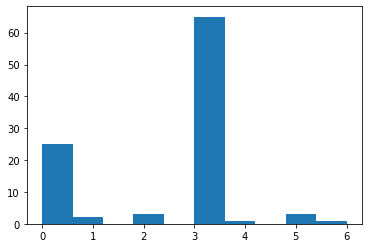

In [76]:
counts, bins = np.histogram(lst1)
plt.hist(bins[:-1], bins, weights=counts)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

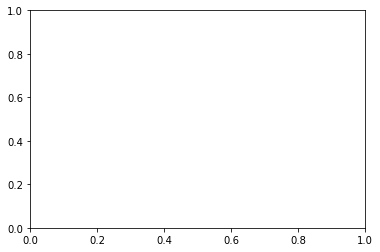

In [51]:
counts, bins = np.histogram(lst1)
plt.bar(counts, bins)